In [1]:
# project: p1
# submitter: rgsroda
# partner: none
# hours: 10

In [2]:
#q1
type(7/2)

float

In [3]:
#q2
x = 4
maximum = 10
minimum = 5
error = x < minimum or x > 10 # True if x is outside the minimum-to-maximum range
error

True

In [4]:
#q3
word = "KAFKAESQUE"
suffix_match = word[-5:] == "ESQUE" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match 

True

In [5]:
#q4
def add(x,y=1):
    result = x + y
    return result
    
add(3,4)

7

In [6]:
#q5
add(9)

10

In [7]:
#q6
x = 4
if x<0:
    status = "negative"
elif x>0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [8]:
#q7
nums = [3, 4, 1, 6]

def smart_count(list):
    total = 0
    for i in range(0,len(list)):
        if list[i] < 0:
                break
        if list[i] <= 10:
            total = total + list[i]
            continue
    return total
smart_count(nums)

14

In [9]:
#q8
smart_count([2,1,11,3,15,-1,8,2])

6

In [10]:
#q9
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]
coord3["z"]= 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [11]:
#q10
rows[0][-1]["x"]

8

In [12]:
#q11
import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [13]:
#q12
l=[]
r=[]
for i in range(0,len(rows)):
    r.append(rows[i][header.index("B")])
sum(r)

10007

In [14]:
#q13
def get_column_b(row):
    return row[header.index("B")]

rows.sort(key=get_column_b)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [15]:
from json import load

In [16]:
#q14
f = open("usd.json")
data = load(f)
f.close()
data['eur']['rate']*400

351.68980166476797

In [17]:
#q15
def divide(x,y):
    try:
        result = x/y
        return result
    except ZeroDivisionError:
        return float("nan")
        
        
divide(3,2)

1.5

In [18]:
#q16
divide(-3,0)

nan

In [19]:
#q17
import os,sys
import pandas as pd
years = {}
directory = os.listdir("home-computers")
for i in directory:
    df = pd.read_csv(os.path.join("./home-computers",i),skiprows=1)
    for char in range(0,len(i)):
        if i[char] == '.':
            years[int(i[char - 4:char])] = df.set_index("Geographic Area Name")
            break
sorted(list(years.keys()))

[2013, 2014, 2015, 2016, 2017, 2018]

In [20]:
#q18
df = years[2018]
df.at["Wisconsin","Estimate!!Total"]

2371960

In [21]:
#q19
df = years[2018]
sum(df["Estimate!!Total!!No Computer"])


10285814

In [22]:
#q20
df = years[2018]
for i in range(0,len(df)):
    s1 = df["Margin of Error!!Total!!No Computer"]
    s2 = df["Estimate!!Total!!No Computer"]
s3 = s1/s2
max(s3)

0.12375641594322287

In [23]:
#q21
states = ["Wisconsin", "Michigan", "Illinois", "Minnesota", "Indiana", "Iowa"]
percent = {}
for i in states:
    percent[i] = (df.at[i, "Estimate!!Total!!No Computer"] / df.at[i, "Estimate!!Total"])*100
percent

{'Wisconsin': 9.582497175331794,
 'Michigan': 8.936374942955922,
 'Illinois': 8.524143737625552,
 'Minnesota': 7.491847623005652,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103}

Text(0, 0.5, '% of Househould w/o Computers')

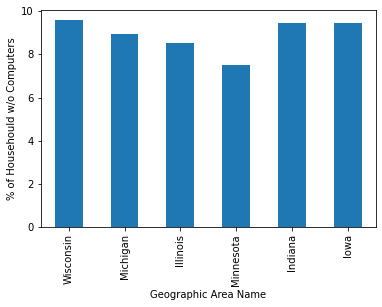

In [24]:
#q22
series = pd.Series(percent)
plot = series.plot.bar()
plot.set_xlabel("Geographic Area Name")
plot.set_ylabel("% of Househould w/o Computers")

(0.0, 400.0)

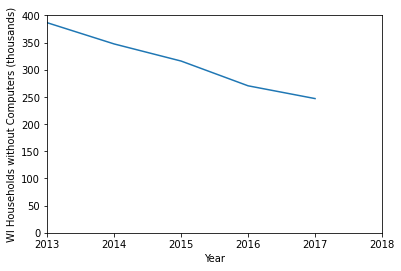

In [25]:
#q23
wisco_comp = {}
for i in range(2013,2018):
    wisco_comp[i] = (years[i].at["Wisconsin","Estimate!!Total!!No Computer"]/1000)
series = pd.Series(wisco_comp)
lineplot = series.plot.line()
lineplot.set_xlabel("Year")
lineplot.set_ylabel("WI Households without Computers (thousands)")
lineplot.set_xlim(2013,2018)
lineplot.set_ylim(0,400)

Text(0.5, 0, 'Smartphones (Millions)')

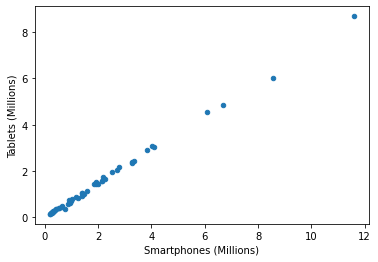

In [26]:
#q24
smartphones = (df["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]) /1000000
smartphones1 = list(smartphones)
tablet = (df["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"])/1000000
tablet1 = list(tablet)

dataf2 = pd.DataFrame(columns = ["Smartphones","Tablet"])
dataf2["Smartphones"] = smartphones1
dataf2["Tablet"] = tablet1

ax6 = dataf2.plot.scatter(x="Smartphones",y="Tablet")
ax6.set_ylabel("Tablets (Millions)")
ax6.set_xlabel("Smartphones (Millions)")

In [27]:
import subprocess

In [28]:
#q25
output = subprocess.check_output(["git", "log"], cwd = "flask", encoding = 'utf-8').split("\n")
output[0]

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [29]:
#q26
output[0:50]

['commit 660994efc761efdfd49ca442b73f6712dc77b6cf',
 'Merge: 0fb5c2f0 9e50ad55',
 'Author: David Lord <davidism@gmail.com>',
 'Date:   Wed Dec 22 20:07:07 2021 -0700',
 '',
 "    Merge branch '2.0.x'",
 '',
 'commit 9e50ad55ae6c3938c2ffd0cad89942c12fca865c',
 'Author: David Lord <davidism@gmail.com>',
 'Date:   Wed Dec 22 20:06:08 2021 -0700',
 '',
 '    pin os and python version in rtd build',
 '',
 'commit 0fb5c2f034fc2f4cfe920408bb97c9d07ef0995e',
 'Merge: 93a7f08b 1a1c7ea6',
 'Author: David Lord <davidism@gmail.com>',
 'Date:   Wed Dec 22 20:02:52 2021 -0700',
 '',
 "    Merge branch '2.0.x'",
 '',
 'commit 1a1c7ea61860ad97a998b24532f0a89a5aee7914',
 'Author: David Lord <davidism@gmail.com>',
 'Date:   Wed Dec 22 19:58:07 2021 -0700',
 '',
 '    pin os and python version in rtd build',
 '    ',
 '    (cherry picked from commit 93a7f08bbca37de2ef73cc21ebfcb6e446087616)',
 '',
 'commit 93a7f08bbca37de2ef73cc21ebfcb6e446087616',
 'Author: David Lord <davidism@gmail.com>',
 'Date:   We